In [19]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from collections import Counter

In [20]:
data=pd.read_csv("kaggle-survey-2018/multipleChoiceResponses.csv")
preguntas=data.iloc[:1]
data = data.iloc[1:]

/srv/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
data=data[data["Q3"]!="I do not wish to disclose my location"]
a=Counter(data["Q3"])
a['United States'] = a.pop("United States of America")
a["United Kingdom"] = a.pop("United Kingdom of Great Britain and Northern Ireland")
a["Iran, Islamic Rep."] = a.pop("Iran, Islamic Republic of...")
a["Hong Kong SAR, China"] = a.pop("Hong Kong (S.A.R.)")
a["Korea, Dem. People’s Rep."] = a.pop("Republic of Korea")
a["Korea, Rep."] = a.pop("South Korea")

In [22]:
poblacion=pd.read_csv("https://raw.githubusercontent.com/datasets/population/master/data/population.csv")
population=poblacion.iloc[2624:]
population=population[population["Year"]==2016]

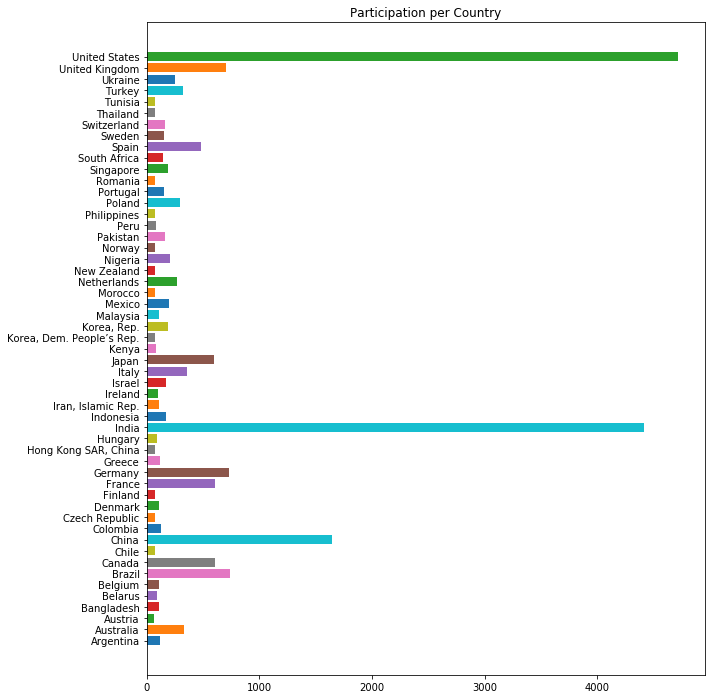

In [23]:
plt.figure(figsize=(10,12))
for i in population["Country Name"]:
    if i in a:
        plt.barh(i,a[i])
plt.title("Participation per Country")
plt.show()  

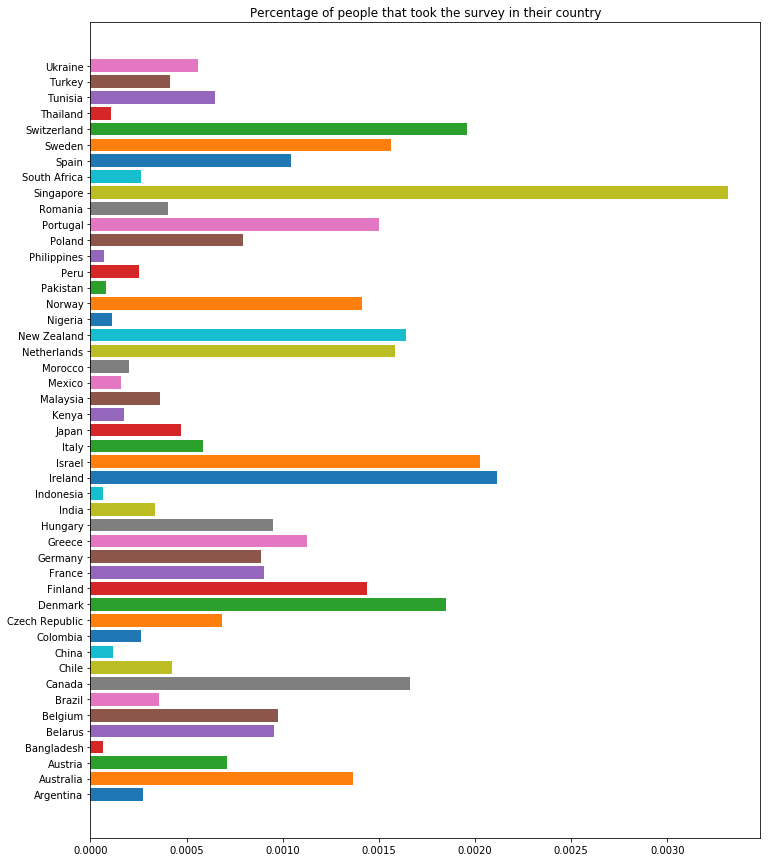

In [24]:
population['new_index'] = range(len(population)) #orders the list
population = population.set_index('new_index')
proportion = {}
for l in range(len(population['Country Name'])):
    proportion[population['Country Name'][l]] = population['Value'][l]

plt.figure(figsize=(12,15))
porcentage_data = {}
for i in population['Country Name']:
    if i in Counter(data.Q3):
        porcentage_data[i] = (a[i]/proportion[i])*100
        plt.barh(i,(a[i]/proportion[i])*100)
plt.title('Percentage of people that took the survey in their country')
plt.show()

# Gender In Countries

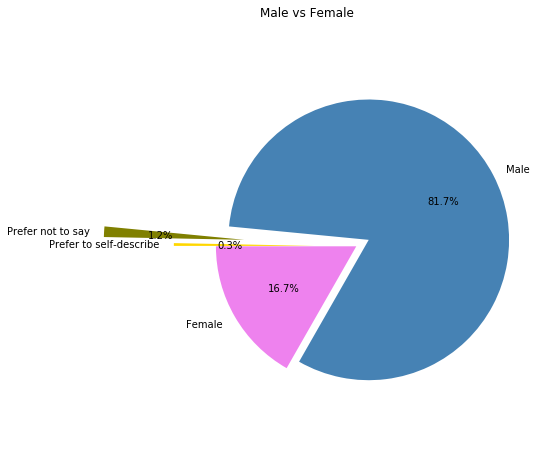

In [25]:
total=len(data)
labels=[]
values=[]
plt.figure(figsize=(8,8))
for i in sorted(Counter(data["Q1"])):
    labels.append(i)
    values.append(Counter(data["Q1"])[i])
colors=["violet","steelblue","olive","gold"]
explode = (0, 0.1, 0.8, 0.3)
plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
plt.axis("equal")
plt.title("Male vs Female")
plt.show()

In [26]:
def plotting_male_vs_female(data,title):
    total= len(data)
    labels=[]
    values=[]
    plt.figure(figsize=(8,8))
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    colors=["violet","steelblue","olive","gold"]
    explode = (0, 0.1, 0.8, 0.3)
    plt.pie(values,labels=labels,shadow=False,colors=colors,explode=explode,startangle=180,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+title)
    plt.show()

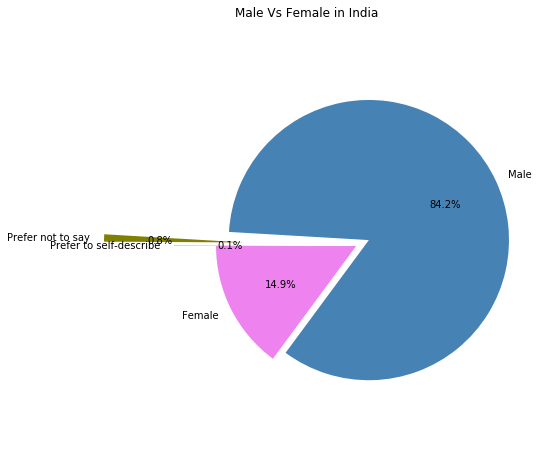

In [27]:
datos_India=data[data.Q3=="India"]
plotting_male_vs_female(datos_India.Q1,"India")

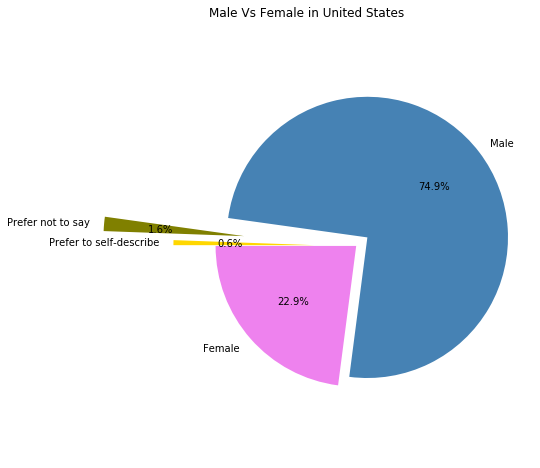

In [28]:
datos_USA=data[data.Q3=="United States of America"]
plotting_male_vs_female(datos_USA.Q1,"United States")

# Gender in Latin-America

In [29]:
def plot_Lat_america(data):
    total= len(data)
    labels=[]
    values=[]
    for i in sorted(Counter(data)):
        labels.append(i)
        values.append(Counter(data)[i])
    return labels, values


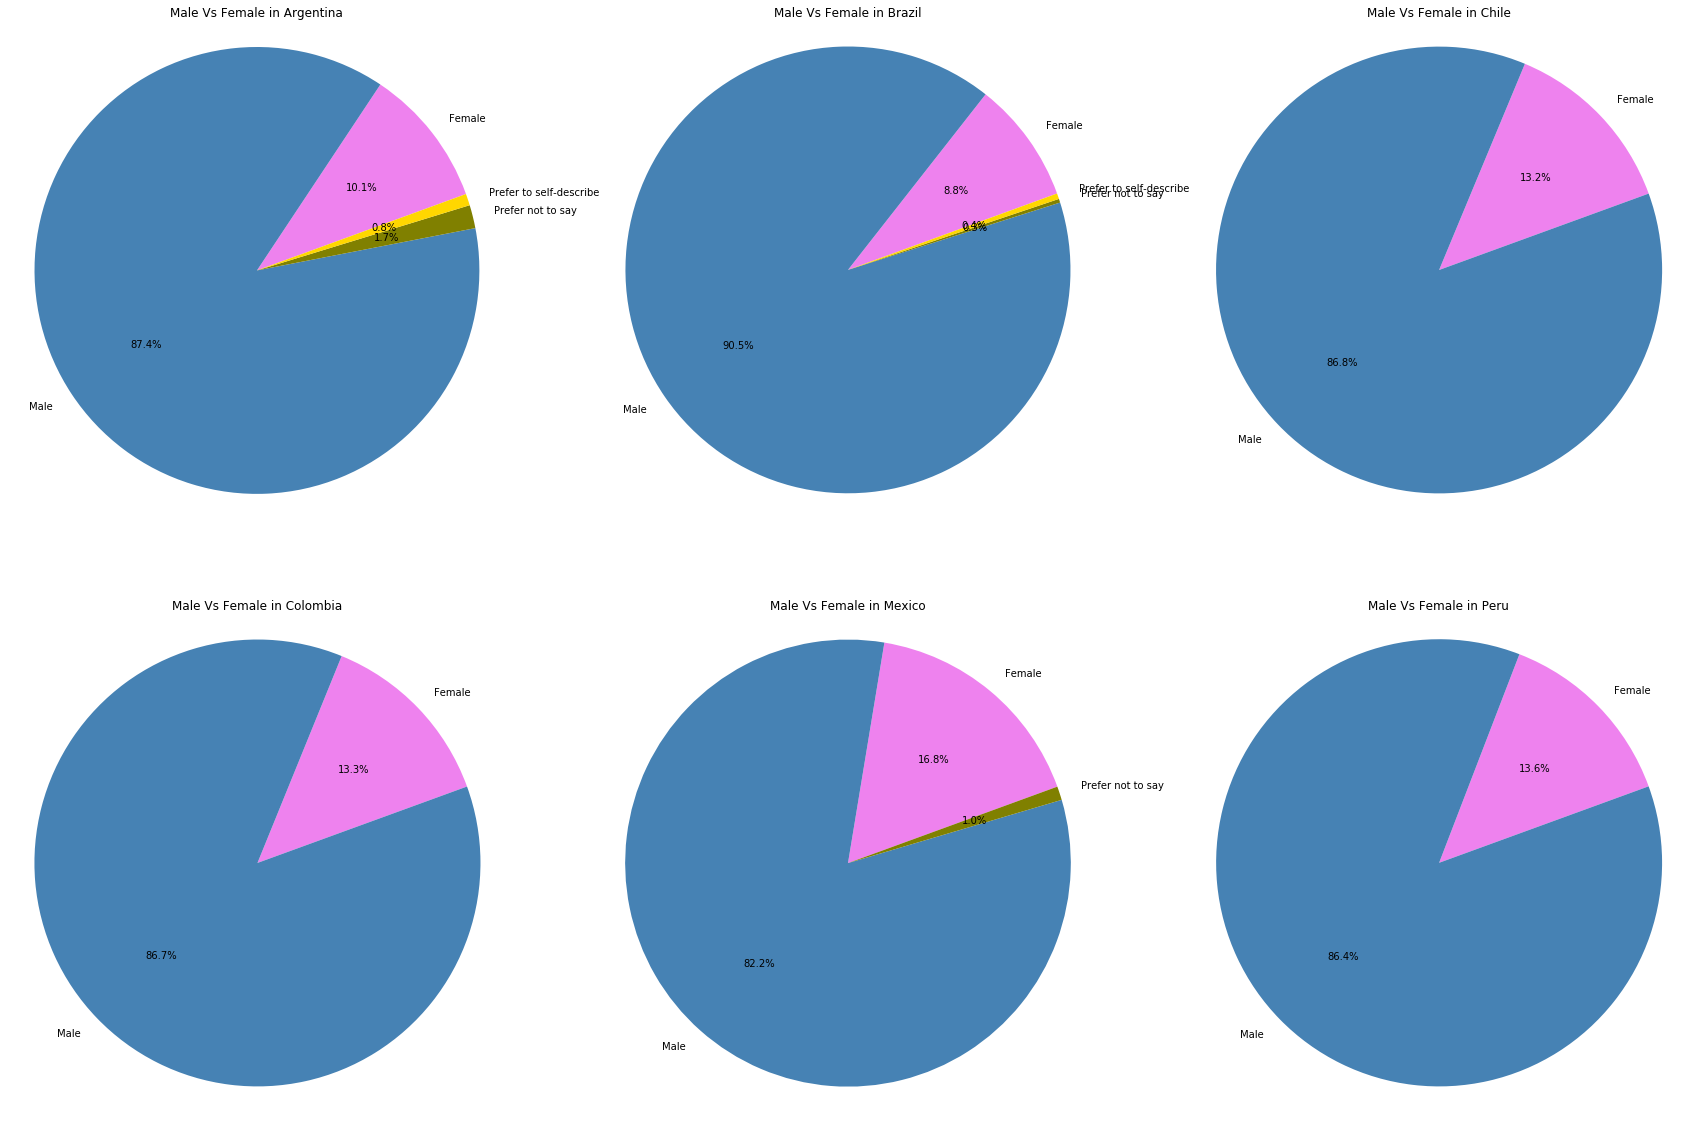

In [30]:
plt.figure(figsize=(30,20))
Lat_american=["Argentina","Brazil","Chile","Colombia","Mexico","Peru"]
k=1
for i in Lat_american:
    datos_lat=data[data.Q3==i]
    labels,values=plot_Lat_america(datos_lat.Q1)
    colors=["violet","steelblue","olive","gold"]
    plt.subplot(2,3,k)
    plt.pie(values,labels=labels,shadow=False,colors=colors,startangle=20,autopct='%1.1f%%')
    plt.axis("equal")
    plt.title("Male Vs Female in "+i)
    k+=1
plt.show()

# Question we are interested in

In [31]:
data = data.rename(columns={'Q2': 'Age', 'Q3': 'Country', 'Q4': 'Education', 'Q5': 'Major', 'Q6': 'Role', 
                            'Q7': 'industry','Q8': 'Experience', 'Q9': 'Salary'})

In [32]:
for i in Lat_american:
    datos_lat=data[data.Country==i]
    idd=0
    for j in datos_lat.Salary.dropna():
        if len(j)>20:
            #print(j[:-4].split("-"))
            idd+=1
    print(i,idd,str(len(datos_lat.Salary.dropna())/idd)+"%")

Argentina 13 8.615384615384615%
Brazil 97 6.742268041237113%
Chile 10 7.0%
Colombia 14 8.214285714285714%
Mexico 32 5.75%
Peru 20 3.7%


In [33]:
nuevo_dict={}
for i in Lat_american:
    nuevo=data[data.Country==i]
    nuevo=nuevo[nuevo.Education != "I prefer not to answer"]
    nuevo=nuevo[nuevo.Education != 'No formal education past high school']
    for j in Counter(nuevo.Education.dropna()).keys():
        if i in nuevo_dict:
            nuevo_dict[i].append(Counter(nuevo.Education.dropna())[j])
        else:
            nuevo_dict[i]=[Counter(nuevo.Education.dropna())[j]]

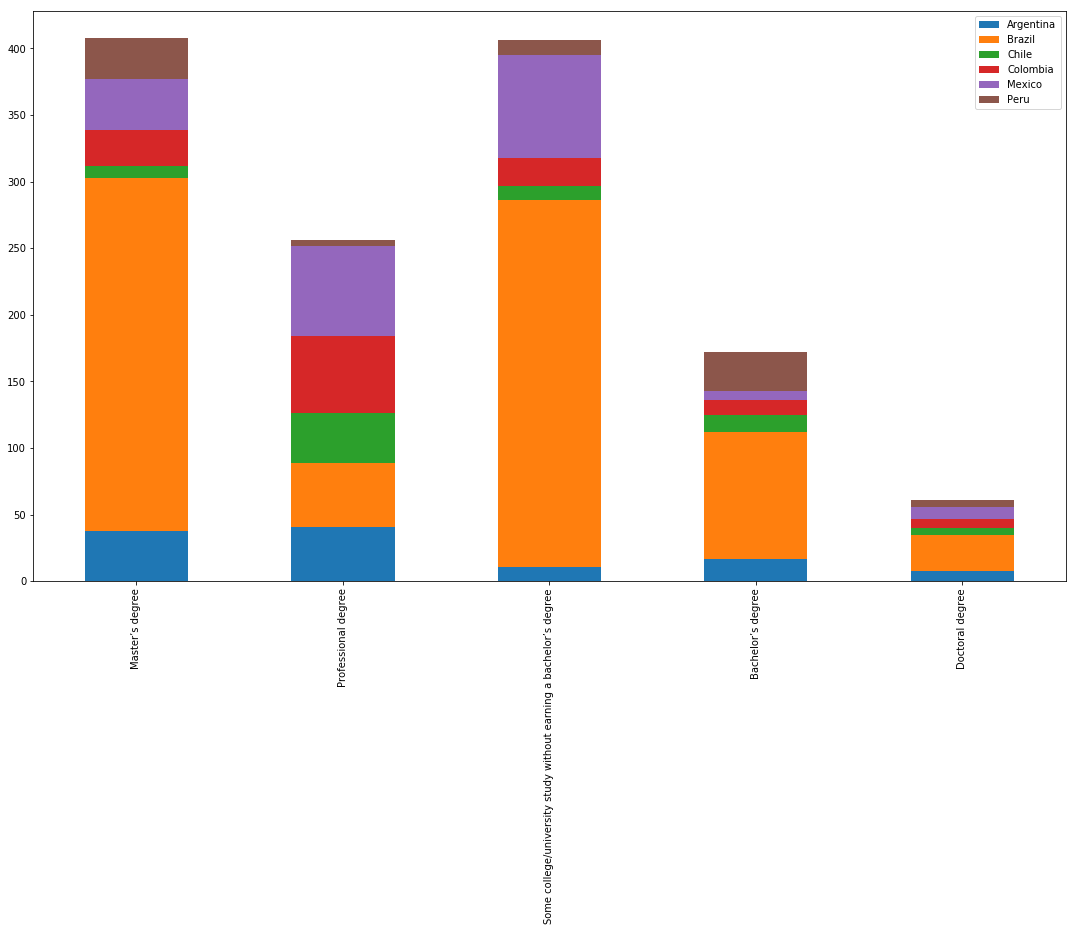

In [34]:
x_axis=list(Counter(nuevo.Education.dropna()).keys())
index = pd.Index(x_axis, name=' ')
datos_education = nuevo_dict
df = pd.DataFrame(datos_education, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
#ax.set_ylabel('foo')
plt.show()

In [35]:
data.loc[:,'numero'] = range(len(data))

In [42]:
#redefine salary
New_data=data
salaries = np.zeros(len(New_data))
num = 0
for string in data['Salary']:
    try:
        math.isnan(string)
        salaries[num] = float('NaN')
        num += 1
    except:
        if string == '500,000+':
            salaries[num] = 500.0
        else:
            salaries[num] = np.max(np.int_(np.array(string[:-4].split('-'))))
        num+=1
data.loc[:,'salary x1000 (USD)'] = salary_list

KeyError: 'salary'

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Age,Country,Education,Major,Role,Q6_OTHER_TEXT,industry,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,numero
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,2
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,3
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,4
6,1142,Male,-1,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,NaN,NaN,NaN,Afraid that others will use my work without gi...,NaN,I had never considered making my work easier f...,NaN,NaN,-1,5
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,6
8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,7
9,641,Male,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),Not employed,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,8
10,751,Male,-1,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,-1,Online Service/Internet-based Services,...,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,-1,9


Argentina
[38 41 11 17  8] [38 41 11 17  8]
Brazil
Chile
Colombia
Mexico
Peru


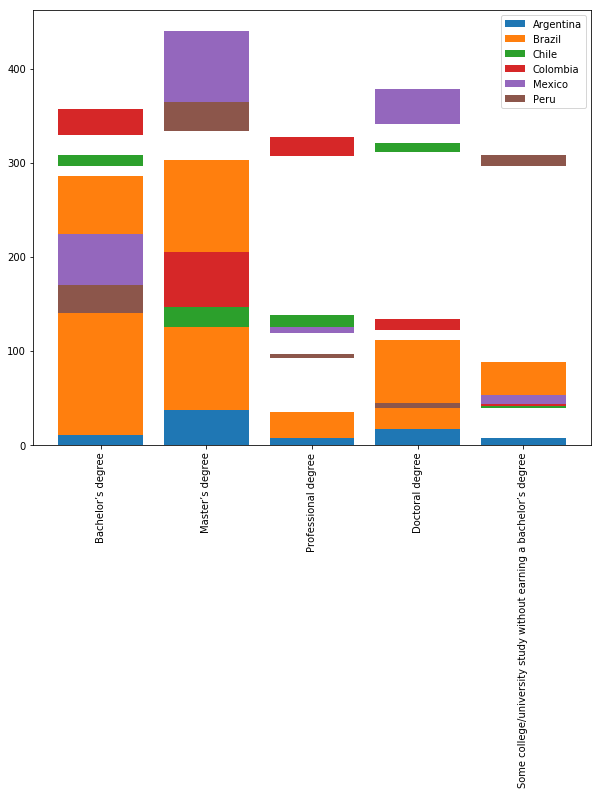

In [38]:
#f,ax=plt.subplots(2,3,sharex=True)
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
aux=0
for i in Lat_american:
    datos_lat=data[data.Country==i]
    datos_lat=datos_lat[datos_lat.Education != "I prefer not to answer"]
    datos_lat=datos_lat[datos_lat.Education != 'No formal education past high school']
    N=Counter(datos_lat.Education.dropna())
    x=np.array(list(N.keys()))
    y=np.array(list(N.values()))
    #plt.bar(x,y,label=i)
    print(i)
    if aux==0:
        plt.bar(x,y,label=i)
        anterior=y
        print(anterior,y)
        aux+=1
    elif aux==1:
        plt.bar(x,y,label=i,bottom=anterior)
        anterior+=y
        aux+=1
    else:
        #anterior+=y
        M = y +anterior
        plt.bar(x,y,label=i,bottom=M)
plt.legend()
plt.show()